# Heart Failure Prediction using Multi-Layer Perceptron Classifier 
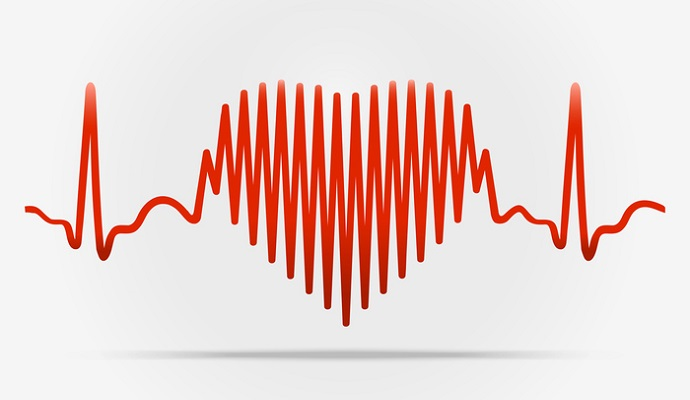

In [30]:
import numpy as np
import pandas as pd
import missingno as m
import plotly.express as px
import seaborn as sns

# Reading Dataset

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [29]:
df.describe().style.background_gradient(cmap="Blues")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Data Cleaning

<AxesSubplot:>

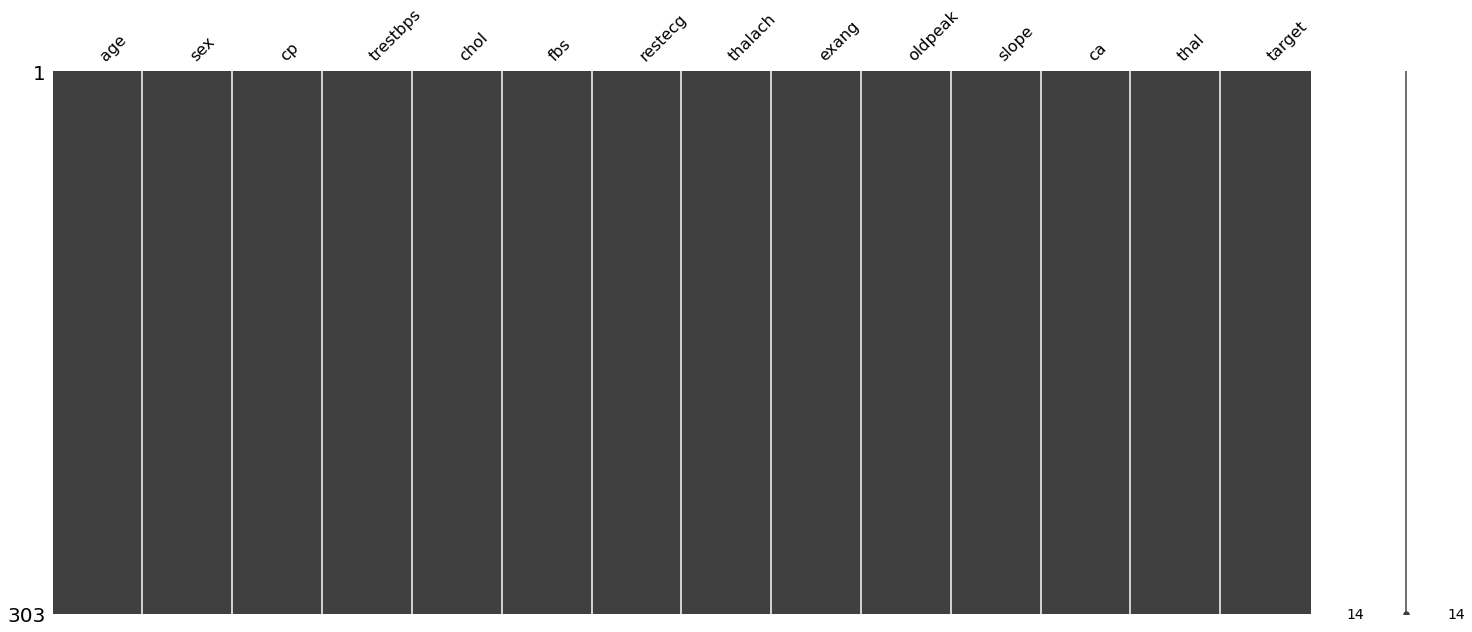

In [6]:
m.matrix(df)

In [53]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Dataset is Already Cleaned

In [51]:
df.head().style.background_gradient(cmap="Blues")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300000,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500000,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400000,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800000,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600000,2,0,2,1


# Univariate, Bivariate and Multivariate Analysis

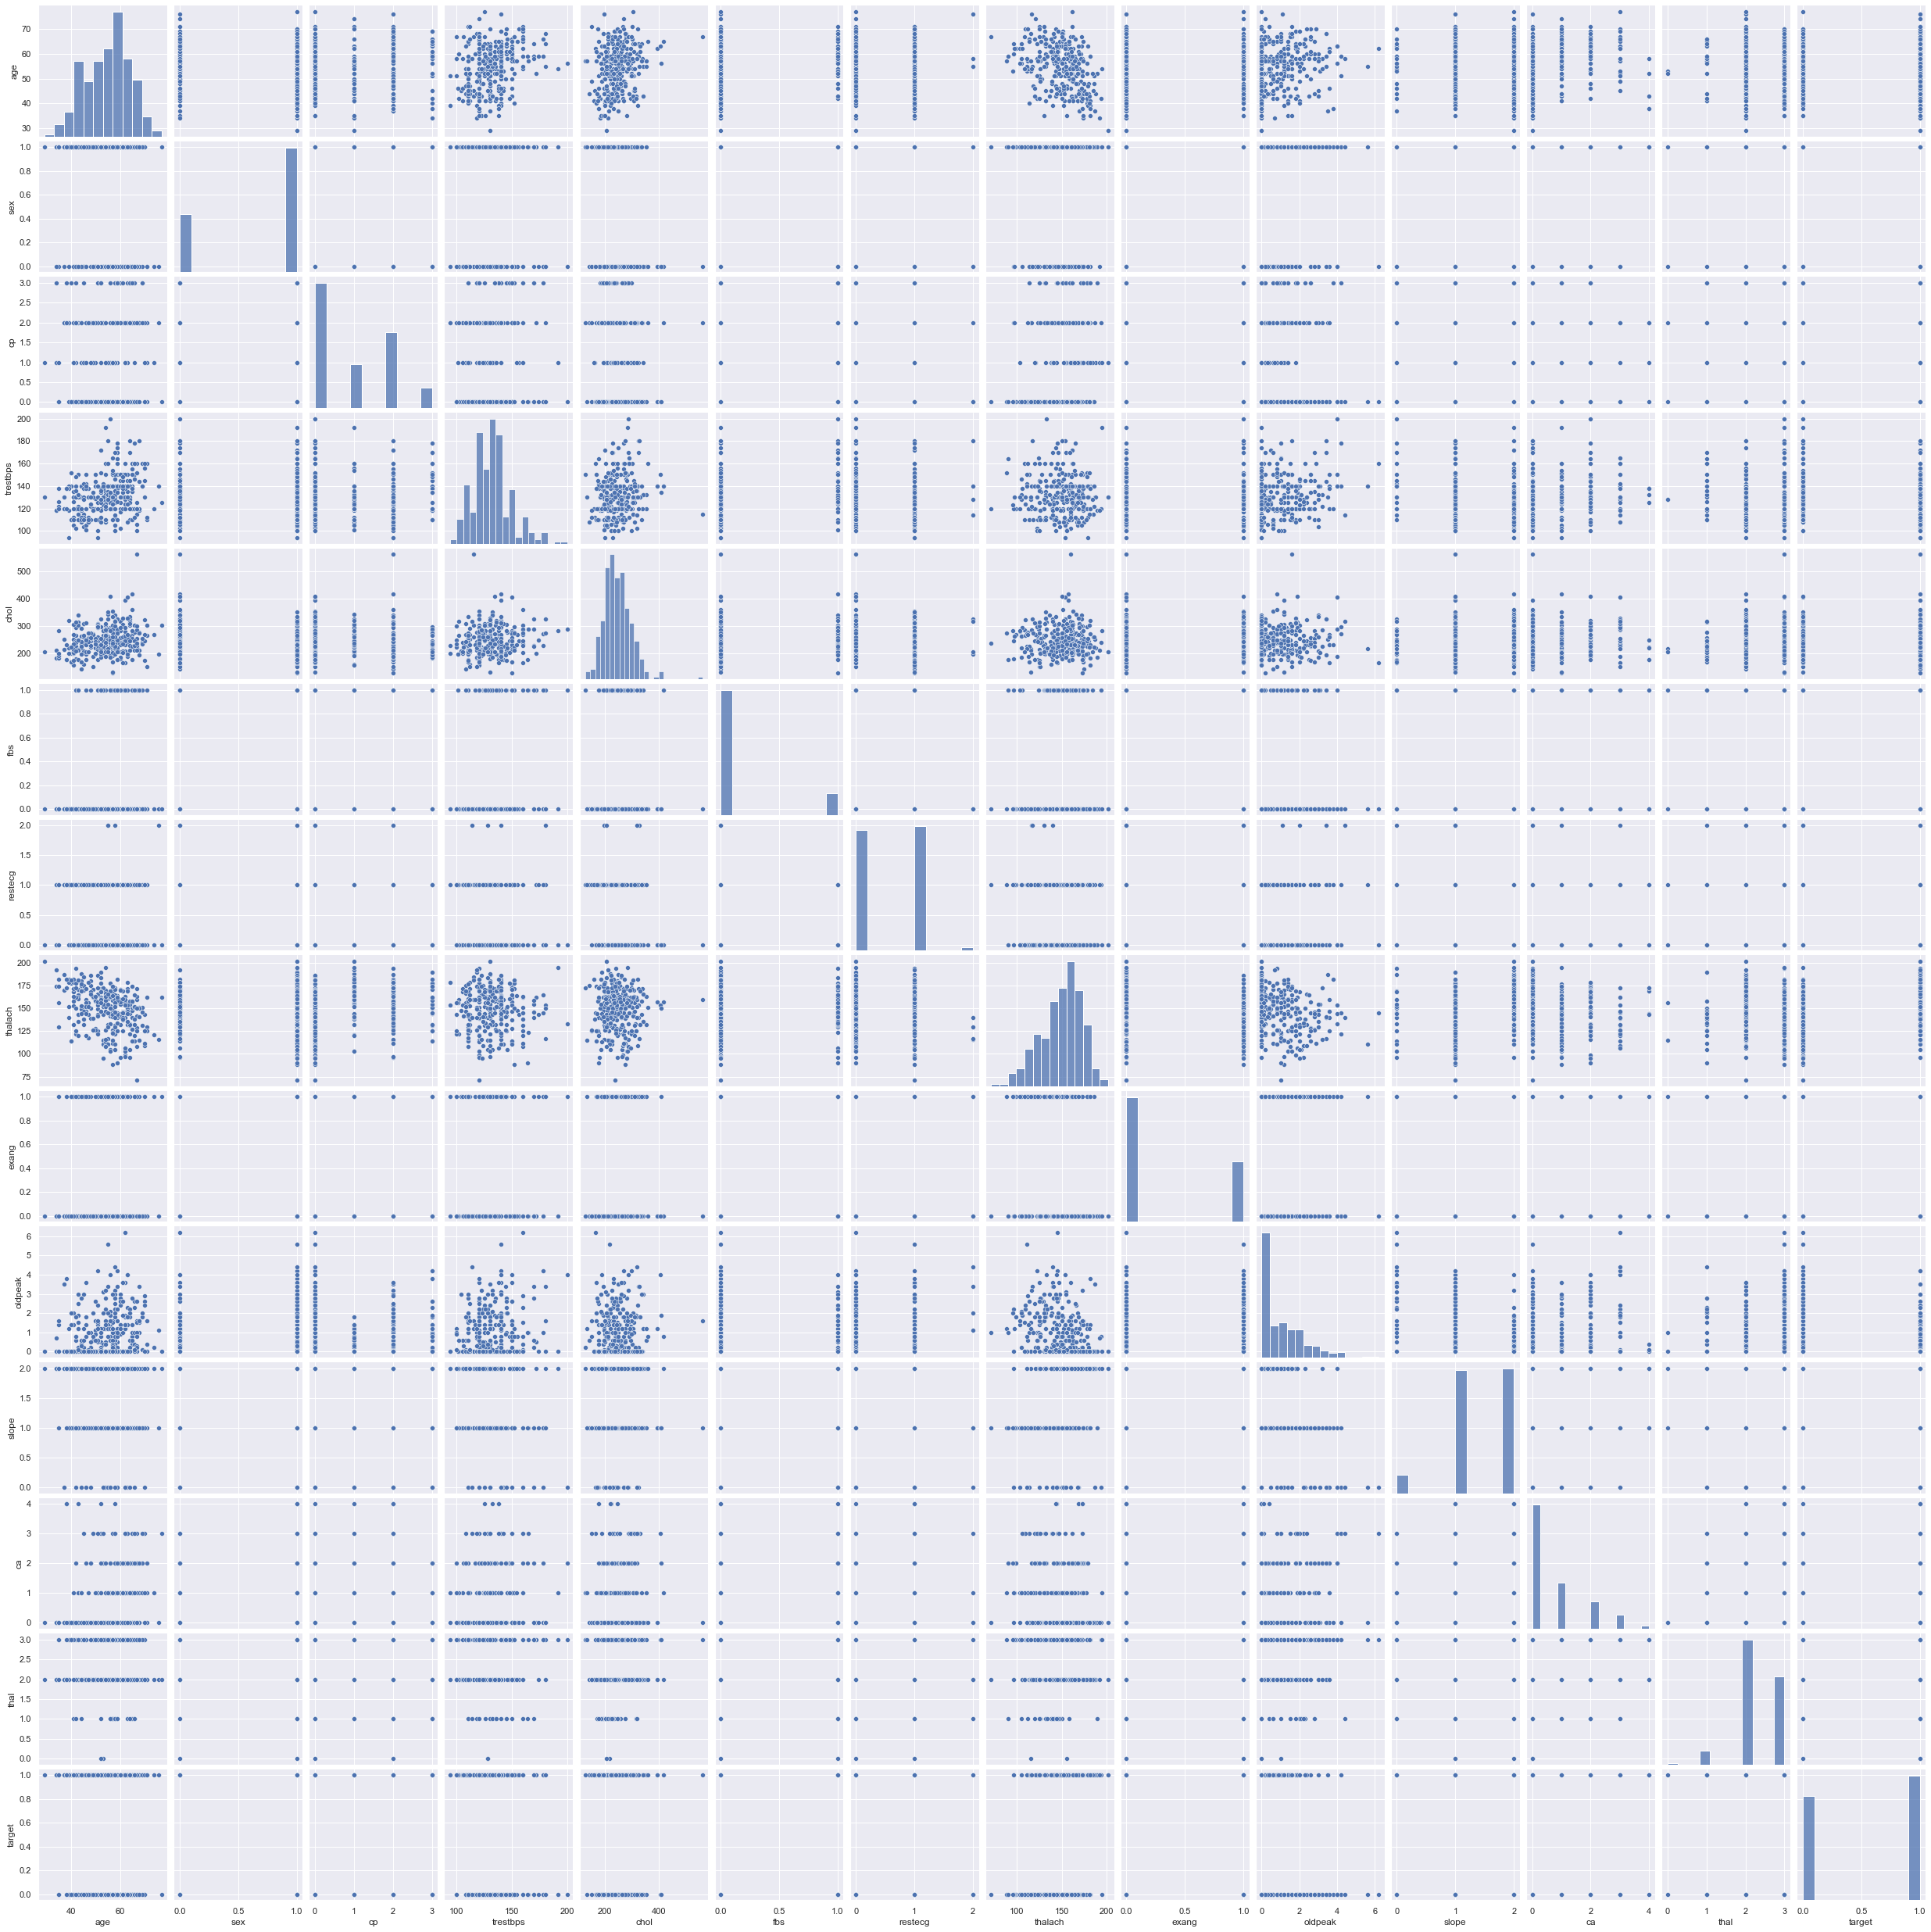

In [54]:
sns.pairplot(df)

<AxesSubplot:xlabel='target', ylabel='count'>

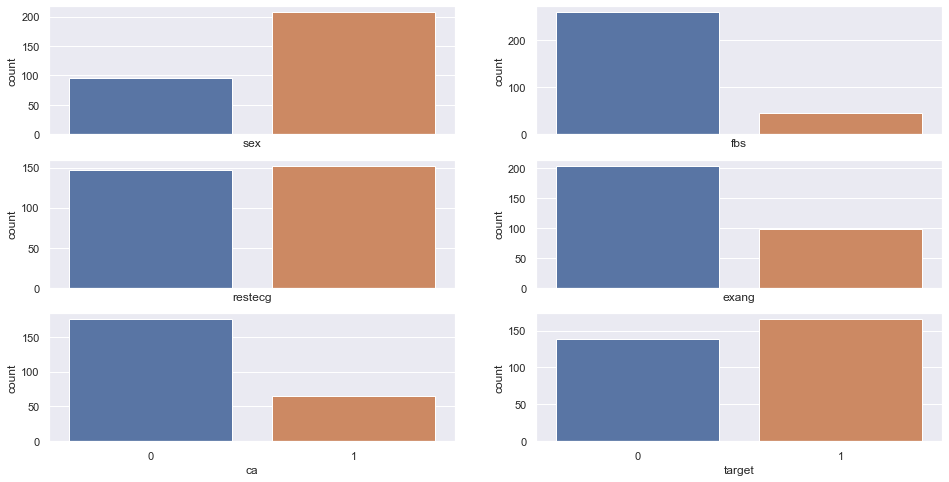

In [9]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(3, 2, sharex=True, figsize=(16,8))
sns.countplot(ax=axes[0,0],x='sex',data = df)
sns.countplot(ax=axes[0,1],x='fbs',data = df)
sns.countplot(ax=axes[1,0],x='restecg',data = df)
sns.countplot(ax=axes[1,1],x='exang',data = df)
sns.countplot(ax=axes[2,0],x='ca',data = df)
sns.countplot(ax=axes[2,1],x='target',data = df)

In [32]:
fig = px.histogram(df, x='cp',color='target')
fig.show()

In [40]:

fig = px.violin(df, y="age",x='target',title='Heart Attack rate with target',points='all',box=True)
fig.show()

In [33]:
fig = px.bar(df, y="age",x='cp',color='target')
fig.show()

In [36]:
fig = px.box(df, y="age",x='thal',color='target',points='all')
fig.show()

In [13]:
fig = px.scatter(df,x='age', y='chol',color='target')
fig.show()

In [14]:
fig = px.scatter(df,x='chol', y='trestbps',color='target')
fig.show()

In [42]:
fig = px.scatter(df, x="age", y="chol", color="thal",
                 size='slope', hover_data=['target'])
fig.show()

In [16]:
fig = px.scatter_3d(df, x='age', y='chol', z='trestbps',
              color='oldpeak')
fig.show()


In [17]:
fig = px.scatter_3d(df, x='chol', y='age', z='thalach',
              color='oldpeak', size='thal', size_max=18,
              symbol='target', opacity=0.7)
fig.show()

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Heatmap

<AxesSubplot:>

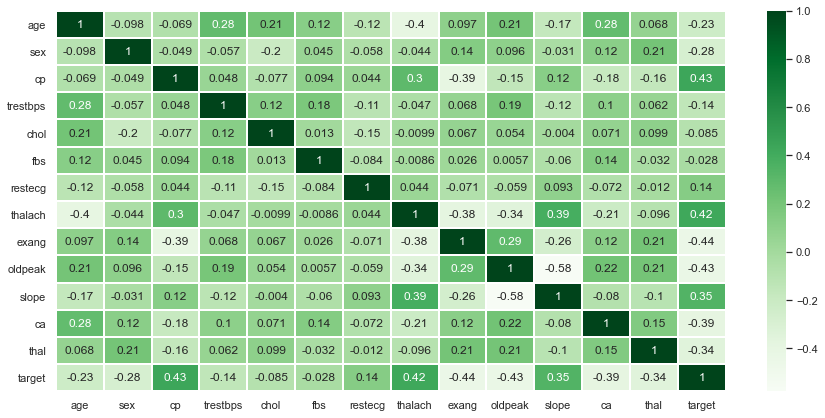

In [19]:
plt.subplots(figsize=(15,7))
sns.heatmap(df.corr(),annot =True,linewidth=1,cmap='Greens')

In [20]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [21]:
df['fbs'].unique()

array([1, 0], dtype=int64)

# X and y Split

In [22]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Train Test Split

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Selection

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Multi-Layered Perceptron Classifier

In [25]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(random_state=10, max_iter=300)
classifier.fit(X_train, y_train)

C:\Users\KIIT\Anaconda3\envs\python 36 with tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



MLPClassifier(max_iter=300, random_state=10)

In [45]:
y_pred = classifier.predict(X_test)
data = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
print(data)

[[0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]]


# Confusion Matrix

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[27  6]
 [ 3 40]]


0.881578947368421

<AxesSubplot:>

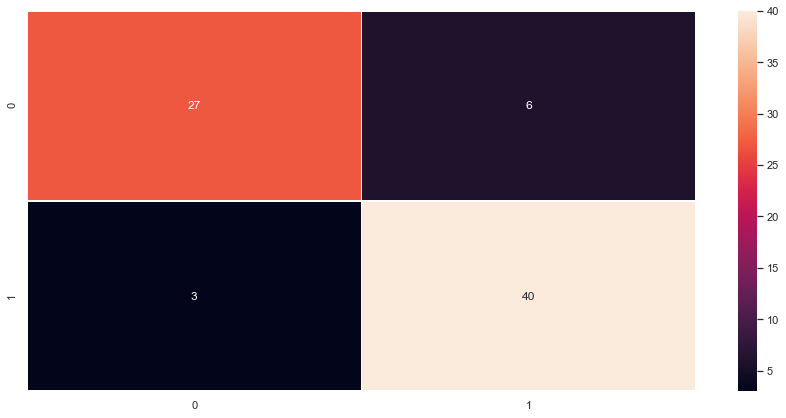

In [43]:
plt.subplots(figsize=(15,7))
sns.heatmap(cm,annot=True,linewidth=1)

# Acccuracy

In [44]:
print('Accuracy : ',accuracy_score(y_test, y_pred))

Accuracy :  0.881578947368421


In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        33
           1       0.87      0.93      0.90        43

    accuracy                           0.88        76
   macro avg       0.88      0.87      0.88        76
weighted avg       0.88      0.88      0.88        76



In [47]:
dataset = pd.DataFrame({'y_test': data[:, 0], 'model_lgbm_pred': data[:, 1]})
dataset.to_csv('accuracy.csv')
dataset = pd.read_csv('accuracy.csv')
dataset

,Unnamed: 0,y_test,model_lgbm_pred
0,0,0,0
1,1,1,1
2,2,1,0
3,3,0,0
4,4,0,1
...,...,...,...
71,71,1,1
72,72,1,1
73,73,0,0
74,74,0,0


# Actual Value vs Predicted Value Plotting

In [50]:
import plotly.graph_objects as go



fig = go.Figure()
fig.add_trace(go.Bar(x=dataset['Unnamed: 0'],
                y=dataset['y_test'],
                name='Actual Value',
                marker_color='crimson'
                ))
fig.add_trace(go.Bar(x=dataset['Unnamed: 0'],
                y=dataset['model_lgbm_pred'],
                name='Predicted Value',
                marker_color='rgb(26, 118, 255)'
                ))

fig.update_layout(
    title='US Export of Plastic Scrap',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='USD (millions)',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

## This Model can Successfully Predict Heart Failure Rate with an Accuracy of 85%